<a href="https://colab.research.google.com/github/rrizqiaa/MachineLearningTasks/blob/main/6stWeekTask/week6_clusteringmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

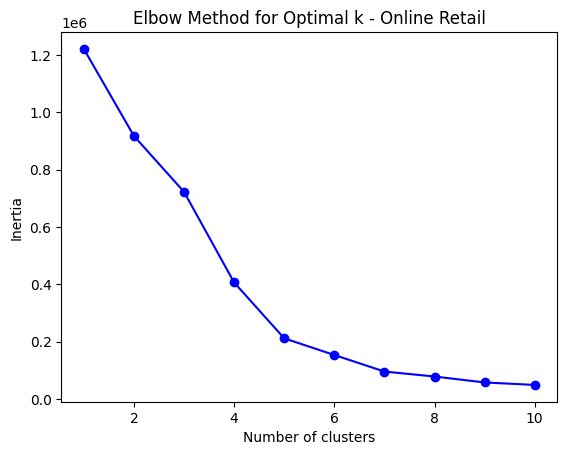

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load and preprocess Online Retail dataset
online_retail_df = pd.read_excel('OnlineRetail.xlsx').dropna()
scaler = StandardScaler()
online_retail_df_scaled = scaler.fit_transform(online_retail_df.select_dtypes(include=[float, int]))

# Define clustering pipelines
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

agglo_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('agglo', AgglomerativeClustering(n_clusters=3))
])

dbscan_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.5, min_samples=5))
])

# Elbow method for KMeans
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(online_retail_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k - Online Retail')
plt.show()

# Calculate Silhouette, Calinski-Harabasz, and Davies-Bouldin for each model
for model in [kmeans_pipeline, agglo_pipeline, dbscan_pipeline]:
    model.fit(online_retail_df_scaled)
    labels = model[-1].labels_
    silhouette_avg = silhouette_score(online_retail_df_scaled, labels)
    ch_score = calinski_harabasz_score(online_retail_df_scaled, labels)
    db_score = davies_bouldin_score(online_retail_df_scaled, labels)
    print(f"{model[-1].__class__.__name__} - Silhouette: {silhouette_avg}, Calinski-Harabasz: {ch_score}, Davies-Bouldin: {db_score}")



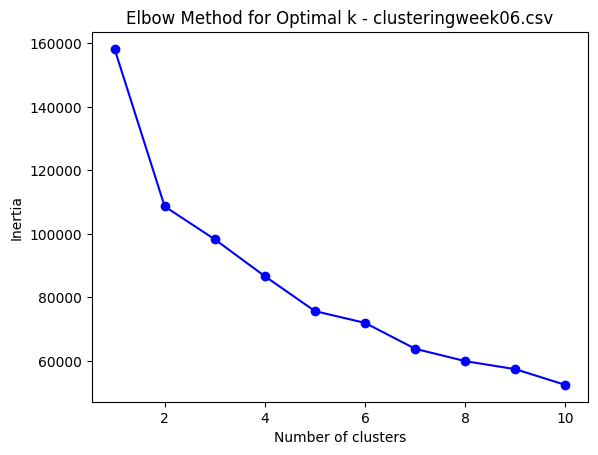

KMeans - Silhouette: 0.3336517041041939, Calinski-Harabasz: 2194.5782371896794, Davies-Bouldin: 1.2655388064008637
AgglomerativeClustering - Silhouette: 0.34917834306499484, Calinski-Harabasz: 2329.6291511992745, Davies-Bouldin: 1.4567542564065181
DBSCAN - Silhouette: -0.22711928007284996, Calinski-Harabasz: 15.308950645279376, Davies-Bouldin: 1.7753924402388312


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load and preprocess clusteringweek06.csv dataset
clustering_df = pd.read_csv('clusteringweek06.csv')
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df.select_dtypes(include=[float, int]))

# Define clustering pipelines
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

agglo_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('agglo', AgglomerativeClustering(n_clusters=3))
])

dbscan_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.5, min_samples=5))
])

# Elbow method for KMeans
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k - clusteringweek06.csv')
plt.show()

# Calculate Silhouette, Calinski-Harabasz, and Davies-Bouldin for each model
for model in [kmeans_pipeline, agglo_pipeline, dbscan_pipeline]:
    model.fit(clustering_df_scaled)
    labels = model[-1].labels_
    silhouette_avg = silhouette_score(clustering_df_scaled, labels)
    ch_score = calinski_harabasz_score(clustering_df_scaled, labels)
    db_score = davies_bouldin_score(clustering_df_scaled, labels)
    print(f"{model[-1].__class__.__name__} - Silhouette: {silhouette_avg}, Calinski-Harabasz: {ch_score}, Davies-Bouldin: {db_score}")


Berdasarkan hasil metrik evaluasi di atas, kita dapat mengambil kesimpulan berikut untuk memilih model clustering terbaik:

1. **Silhouette Score**:
   - **Agglomerative Clustering** memiliki **Silhouette Score** tertinggi (0.349), diikuti oleh **K-Means** (0.334), sementara **DBSCAN** menunjukkan nilai negatif (-0.227), yang berarti kualitas clustering kurang baik.
   - Berdasarkan Silhouette Score, **Agglomerative Clustering** adalah yang terbaik.

2. **Calinski-Harabasz Index**:
   - **Agglomerative Clustering** kembali menunjukkan nilai tertinggi (2329.63), yang berarti data pada cluster tersebut lebih kompak dan saling berjauhan dibanding model lain.
   - **K-Means** berada di posisi kedua (2194.58), sementara **DBSCAN** jauh lebih rendah (15.31), menunjukkan bahwa **DBSCAN** tidak membentuk cluster dengan baik untuk dataset ini.

3. **Davies-Bouldin Index**:
   - **K-Means** memiliki **Davies-Bouldin Index** terendah (1.27), yang mengindikasikan cluster yang lebih terpisah dan kompak dibandingkan **Agglomerative Clustering** (1.46) dan **DBSCAN** (1.78).

### Kesimpulan Akhir
- **Agglomerative Clustering** menunjukkan performa terbaik pada **Silhouette Score** dan **Calinski-Harabasz Index**, sedangkan **K-Means** memiliki nilai **Davies-Bouldin Index** yang sedikit lebih baik.
- Namun, mengingat **Agglomerative Clustering** memiliki **Silhouette Score** dan **Calinski-Harabasz** yang lebih tinggi, **Agglomerative Clustering** adalah model terbaik untuk dataset ini, karena menunjukkan hasil clustering yang lebih kompak dan terpisah.

**Model Terbaik**: **Agglomerative Clustering**